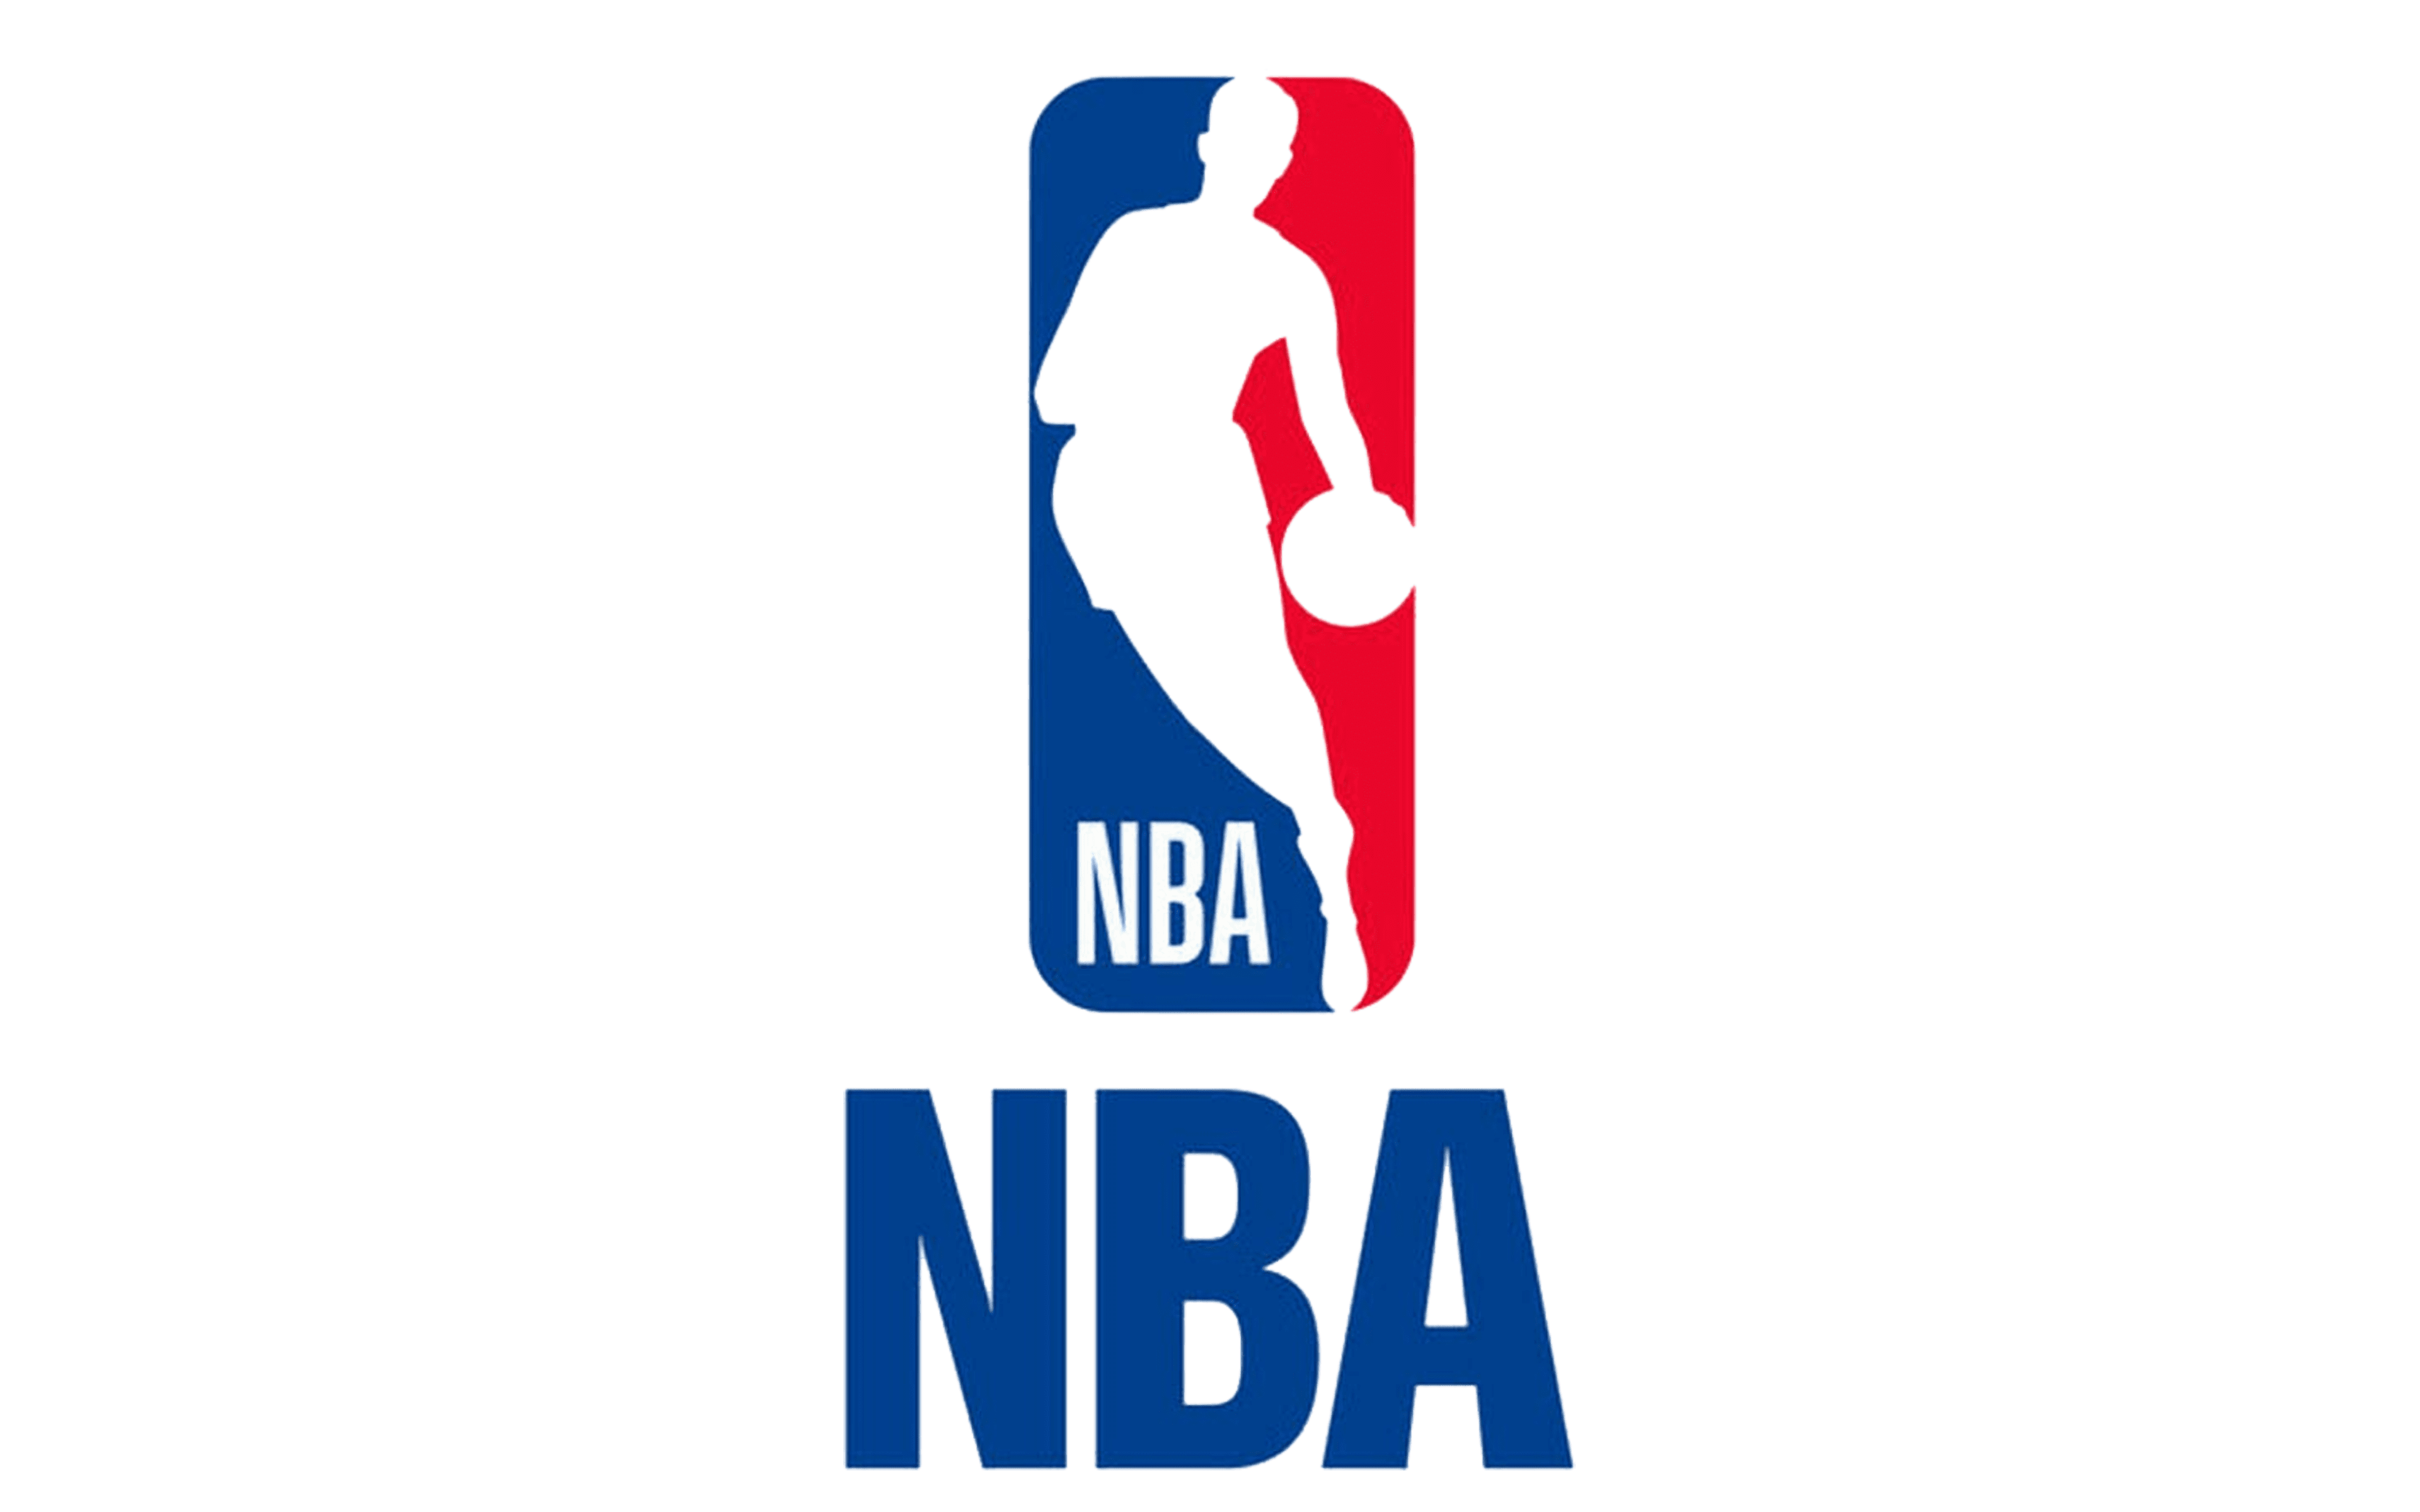

In [115]:
# Imports
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import sqlite3 as sql
import os

In [192]:
# Extract datasets
path = './'
dfGame = pd.read_csv(path+'data/dataset2/csv/game.csv')

In [5]:
# Shape
dfGame.shape

(62266, 54)

In [7]:
# Checking
dfGame.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,2,0
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51,-5,0
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,-6,0
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47,-16,0
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,17,0


In [8]:
dfGame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62266 entries, 0 to 62265
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               62266 non-null  int64  
 1   team_id_home            62266 non-null  int64  
 2   team_abbreviation_home  62266 non-null  object 
 3   team_name_home          62266 non-null  object 
 4   game_id                 62266 non-null  int64  
 5   game_date               62266 non-null  object 
 6   matchup_home            62266 non-null  object 
 7   wl_home                 62265 non-null  object 
 8   min                     62266 non-null  int64  
 9   fgm_home                62248 non-null  float64
 10  fga_home                44404 non-null  float64
 11  fg_pct_home             44365 non-null  float64
 12  fg3m_home               46613 non-null  float64
 13  fg3a_home               41349 non-null  float64
 14  fg3_pct_home            40990 non-null

There many rows with null values

In [18]:
print(dfGame['team_name_home'].unique())

['Toronto Huskies' 'St. Louis Bombers' 'Providence Steamrollers'
 'Chicago Stags' 'Detroit Falcons' 'Cleveland Rebels' 'Pittsburgh Ironmen'
 'Boston Celtics' 'Philadelphia Warriors' 'New York Knicks'
 'Washington Capitols' 'Baltimore Bullets' 'Indianapolis Jets'
 'Ft. Wayne Zollner Pistons' 'Rochester Royals' 'Minneapolis Lakers'
 'Tri-Cities Blackhawks' 'Indianapolis Olympians' 'Waterloo Hawks'
 'Anderson Packers' 'Sheboygan Redskins' 'Syracuse Nationals'
 'Denver Nuggets' 'Milwaukee Hawks' 'St. Louis Hawks' 'Detroit Pistons'
 'Cincinnati Royals' 'Los Angeles Lakers' 'Chicago Packers'
 'Chicago Zephyrs' 'San Francisco Warriors' 'Philadelphia 76ers'
 'Chicago Bulls' 'San Diego Rockets' 'Seattle SuperSonics' 'Atlanta Hawks'
 'Milwaukee Bucks' 'Phoenix Suns' 'Buffalo Braves'
 'Portland Trail Blazers' 'Cleveland Cavaliers' 'Houston Rockets'
 'Golden State Warriors' 'Kansas City-Omaha Kings' 'Capital Bullets'
 'Washington Bullets' 'New Orleans Jazz' 'Kansas City Kings'
 'Indiana Pacers' 'S

In [30]:
# Team list points away
ptsAwayRank = dfGame.groupby('team_name_home')[['pts_away']].sum()
ptsAwayRank['pts_away'].sort_values(ascending=False).head(10)

team_name_home
Boston Celtics           294511
New York Knicks          292069
Detroit Pistons          261586
Los Angeles Lakers       256880
Philadelphia 76ers       241182
Phoenix Suns             222850
Chicago Bulls            220846
Atlanta Hawks            217706
Milwaukee Bucks          216750
Golden State Warriors    211684
Name: pts_away, dtype: int64

In [197]:
fig = px.bar(ptsAwayRank, y = 'pts_away')
fig.update_layout(xaxis = {'categoryorder': 'total descending'})

Boston leads points away rank

In [31]:
# Team list points home
ptsHomeRank = dfGame.groupby('team_name_home')[['pts_home']].sum()
ptsHomeRank['pts_home'].sort_values(ascending=False).head(10)

team_name_home
Boston Celtics            312678
New York Knicks           300000
Los Angeles Lakers        271946
Detroit Pistons           267907
Philadelphia 76ers        248238
Phoenix Suns              233958
Chicago Bulls             228550
Milwaukee Bucks           227001
Atlanta Hawks             224324
Portland Trail Blazers    219141
Name: pts_home, dtype: int64

In [198]:
fig = px.bar(ptsHomeRank, y = 'pts_home')
fig.update_layout(xaxis = {'categoryorder': 'total descending'})

Boston leads points home rank either

In [55]:
# Team list 3pts home rank (fg3_pct_home)
threePtsHome = dfGame.groupby('team_name_home')[['fg3_pct_home']].mean()
threePtsHome['fg3_pct_home'].sort_values(ascending=False).head(10)

team_name_home
LA Clippers                          0.383038
Cleveland Cavaliers                  0.363031
Toronto Raptors                      0.361633
New Orleans Pelicans                 0.361365
Brooklyn Nets                        0.358861
Milwaukee Bucks                      0.358797
Oklahoma City Thunder                0.358723
San Antonio Spurs                    0.358004
New Orleans/Oklahoma City Hornets    0.357780
Utah Jazz                            0.356485
Name: fg3_pct_home, dtype: float64

In [199]:
# Plot the rank
fig = px.bar(threePtsHome, y = 'fg3_pct_home')
fig.update_layout(xaxis = {'categoryorder': 'total descending'})

### Clippers is the 1st in the 3 pts home ranking (best average score)

In [64]:
# Team list 3pts away rank (fg3_pct_away)
threePtsAway = dfGame.groupby('team_name_home')[['fg3_pct_away']].mean()
threePtsAway['fg3_pct_away'].sort_values(ascending=False).head(10)

team_name_home
Toronto Raptors                      0.358316
Washington Wizards                   0.357867
Brooklyn Nets                        0.355853
New Orleans/Oklahoma City Hornets    0.355098
New Orleans Pelicans                 0.354675
Memphis Grizzlies                    0.351472
Oklahoma City Thunder                0.351412
Vancouver Grizzlies                  0.346917
Minnesota Timberwolves               0.346007
Charlotte Bobcats                    0.345580
Name: fg3_pct_away, dtype: float64

In [200]:
# Plot the rank
fig = px.bar(threePtsAway, y = 'fg3_pct_away')
fig.update_layout(xaxis = {'categoryorder': 'total descending'})

### Raptors leads in 3pts away rank (best average score)

# Let's check some additional information about team's performance in the NBA history

In [73]:
# Connect to SQL database
database = path+'/data/dataset2/nba.sqlite'

In [77]:
# Create a connection to the database
connection = sql.connect(database)
print('Connection to the database: OK')

Connection to the database: OK


In [78]:
# Extracting the database
table = pd.read_sql_query('SELECT name \
                           FROM sqlite_master \
                           WHERE type = "table"', connection)
print(table)

                   name
0                player
1                  team
2                  game
3    common_player_info
4          team_details
5          team_history
6          game_summary
7           other_stats
8             officials
9      inactive_players
10            game_info
11           line_score
12         play_by_play
13  draft_combine_stats
14        draft_history
15     team_info_common


## Players drafted through the NBA history by year (from 1947 to 2022)?

In [81]:
# Querying the data
query = """
        SELECT
            season as draft_season,
            COUNT (DISTINCT person_id) AS total_players_drafted
        FROM draft_history
        GROUP BY season;"""
year_draft_totalPlayers = pd.read_sql(query, connection).astype({"draft_season": int})
year_draft_totalPlayers

,draft_season,total_players_drafted
0,1947,78
1,1948,113
2,1949,75
3,1950,121
4,1952,106
...,...,...
66,2017,60
67,2018,60
68,2019,60
69,2020,60


In [89]:
# Plotting number of players drafted through the seasons
px.line(year_draft_totalPlayers,
        x = 'draft_season',
        y = 'total_players_drafted',
        render_mode = 'svg',
        title = ' NBA Draft History (Players drafted by year)')

We could observe that from mid 60's to late 80's had much more players drafted.

After that period the number of players drafted remained steady.

## Which are top 10 teams that drafted most number of palyers in the history?

In [100]:
# Querying the data
query = """
        SELECT COALESCE(team_city, '') || ' ' || COALESCE(team_name, '') AS NBA_Team,
               COUNT(DISTINCT person_id) as total_players_drafted
        FROM draft_history
        GROUP BY NBA_Team
        ORDER BY total_players_drafted DESC
        LIMIT 10
        """
NBA_Teams_TotalDraft = pd.read_sql(query, connection)
NBA_Teams_TotalDraft

,NBA_Team,total_players_drafted
0,New York Knicks,472
1,Boston Celtics,447
2,Philadelphia 76ers,351
3,Detroit Pistons,350
4,Chicago Bulls,339
5,Phoenix Suns,304
6,Los Angeles Lakers,287
7,Atlanta Hawks,281
8,Portland Trail Blazers,273
9,Milwaukee Bucks,264


New York Knicks leads the list of total players drafted

## Where the most players coming from ? (high school, university or other professional league)

In [101]:
# Collectiing the data
query = """
        SELECT organization_type as players_origin,
               COUNT(DISTINCT person_id) AS total_players
        FROM draft_history
        GROUP BY organization_type
        """
playerDraft_origin = pd.read_sql(query, connection)
playerDraft_origin

,players_origin,total_players
0,,20
1,College/University,7334
2,High School,46
3,Other Team/Club,299


In [110]:
# Plotting the data
px.sunburst(playerDraft_origin, 
            path = ['players_origin'],
            values = 'total_players',
            color = 'players_origin',
            hover_data = ['total_players'],
            color_continuous_scale = 'RdBu',
            title = 'Origin of Players Drafted in the NBA history')

We can observe the player drafted by organization through NBA draft history

In [112]:
# Querying the data
query = """
        SELECT season AS draft_season,
               organization_type as player_origin,
               COUNT(DISTINCT person_id) AS total_players_drafted
        FROM draft_history
        GROUP BY organization_type, season
        """
playerDraft_historicLine = pd.read_sql(query, connection).astype({'draft_season': int})

In [114]:
# Plotting the data
px.line(playerDraft_historicLine.dropna(), 
        x = 'draft_season',
        y = 'total_players_drafted',
        color = 'player_origin',
        title = 'NBA draft historic line by organization (origin) of the players')

### Insights:

* until early 2000's NBA drafted only players from the Universities

* although the most players are drafted from university/college we can observe an increase of players drafted from other professional leagues

# Data Analysis: Game Play

## In the NBA history how many teams participated in every season and how many total matches happened in every season?

In [137]:
# Querying the data
query = """
        SELECT strftime('%Y', game_date) as NBA_season,
               COUNT(DISTINCT team_id_home) AS total_NBA_teams,
               COUNT(DISTINCT game_id) AS total_game_count
        FROM game
        GROUP BY NBA_season
        """
team_game_totalSeasonCount = pd.read_sql(query, connection)

In [138]:
# Let's create a plot with a shared X-axis to both players and team counting
two_Yaxis_plot = make_subplots(specs = [[{'secondary_y': True}]])
teamsCount_trace = px.bar(team_game_totalSeasonCount, x = 'NBA_season', y = 'total_NBA_teams')
gamesCount_trace = px.line(team_game_totalSeasonCount, x = 'NBA_season', y = 'total_game_count')
teamsCount_trace.update_traces(name = 'Total NBA Teams', showlegend = True, opacity = 0.4)
gamesCount_trace.update_traces(name = 'Total NBA Season Games', showlegend = True, line_color = 'purple')
two_Yaxis_plot.add_trace(teamsCount_trace.data[0], secondary_y = False)
two_Yaxis_plot.add_trace(gamesCount_trace.data[0], secondary_y = True)
two_Yaxis_plot.update_yaxes(title_text = 'Total NBA Teams', secondary_y = False)
two_Yaxis_plot.update_yaxes(title_text = 'Total NBA Season Games', secondary_y = True)
two_Yaxis_plot.update_layout(title_text = 'Total NBA Games and Teams along the history by season (1946-2022)')

#### Insights:

* we can observe after 70's an explosion of new teams joining the league

* after 2000's we can observe that the number of teams remained steady

* there are some unexplained sudden sinking total season games (seasons 1989, 1998, 2011 and 2018) probably due to the lack o game records in the dataset

* season 2020 is an exception due to the COVID-19, we had a season reduction

<b>Observation:</b> when we try to plot using game_id instead of game_date with found some considerable differences as you can see:

In [147]:
# Querying the data (changing game_date to season_id)
query = """
        SELECT substr(season_id, 2, 5) as NBA_season,
               COUNT(DISTINCT team_id_home) AS total_NBA_teams,
               COUNT(DISTINCT game_id) AS total_game_count
        FROM game
        GROUP BY NBA_season
        """
team_game_totalSeasonCount = pd.read_sql(query, connection)

In [148]:
# Let's create a plot with a shared X-axis to both players and team counting
two_Yaxis_plot = make_subplots(specs = [[{'secondary_y': True}]])
teamsCount_trace = px.bar(team_game_totalSeasonCount, x = 'NBA_season', y = 'total_NBA_teams')
gamesCount_trace = px.line(team_game_totalSeasonCount, x = 'NBA_season', y = 'total_game_count')
teamsCount_trace.update_traces(name = 'Total NBA Teams', showlegend = True, opacity = 0.4)
gamesCount_trace.update_traces(name = 'Total NBA Season Games', showlegend = True, line_color = 'cyan')
two_Yaxis_plot.add_trace(teamsCount_trace.data[0], secondary_y = False)
two_Yaxis_plot.add_trace(gamesCount_trace.data[0], secondary_y = True)
two_Yaxis_plot.update_yaxes(title_text = 'Total NBA Teams', secondary_y = False)
two_Yaxis_plot.update_yaxes(title_text = 'Total NBA Season Games', secondary_y = True)
two_Yaxis_plot.update_layout(title_text = 'Total NBA Games and Teams along the history by season (1946-2022)')

## How did Win-Losses Home games change over the time?

In [150]:
# Querying WL_Home to check this proportion
query = """
        SELECT substr(season_id, 2, 5) AS NBA_Season,
        SUM(CASE wl_home
                WHEN 'W' THEN 1
                ELSE 0
            END) AS home_win_count
        FROM game
        GROUP BY NBA_Season
        """
homeWIN = pd.read_sql(query, connection)
homeWIN

,NBA_Season,home_win_count
0,1946,204
1,1947,111
2,1948,228
3,1949,392
4,1950,265
...,...,...
70,2018,729
71,2019,584
72,2020,587
73,2021,669


We can take leverage of total game teams counting, already queried previously

In [151]:
# Let's plot to observe along the time
homeWIN['home_win_pct'] = round(100 * homeWIN['home_win_count'] / team_game_totalSeasonCount['total_game_count'], 2)
px.line(homeWIN, y = 'home_win_pct', x = 'NBA_Season', title = 'Overall Home Game Won Percentage Variation Over Time')

#### Insights:

* We reached the historical peak at 1956 with almost 78% of home team wins

* After mid 60's we can see a huge decay of home team wins with a ratio of 60% and still continuously decreasing, that seems we have more competitive games

There is another way to see this information (from another perspective) by joining the wl_home and wl_away data

In [157]:
# Let's make a query counting home and away game by team and extracting the percentage for every season
# We will join the two queries (wins and losses) in one dataset
query = """
        SELECT substr(season_id, 2, 5) AS NBA_Season,
               team_id_home AS team_id,
               team_name_home AS team_name,
               SUM(CASE wl_home
                       WHEN 'W' THEN 1
                       ELSE 0
                   END) AS wins_total,
               COUNT(team_id_home) AS team_game_count,
               "home" AS game_location
        FROM game
        GROUP BY NBA_Season, team_id_home
        
        UNION
        
        SELECT substr(season_id, 2, 5) AS NBA_Season,
               team_id_away AS team_id,
               team_name_away AS team_name,
               SUM(CASE wl_away
                       WHEN 'W' THEN 1
                       ELSE 0
                    END) AS wins_total,
               COUNT(team_id_away) AS team_game_count,
               'away' AS game_location
        FROM game
        GROUP BY NBA_season, team_id_away        
        """
team_HOMEAWAY_stats = pd.read_sql(query, connection)
team_HOMEAWAY_stats['wins_pct'] = round(100 * team_HOMEAWAY_stats['wins_total'] / team_HOMEAWAY_stats['team_game_count'], 2)
team_HOMEAWAY_stats

,NBA_Season,team_id,team_name,wins_total,team_game_count,game_location,wins_pct
0,1946,1610610025,Chicago Stags,17,30,away,56.67
1,1946,1610610025,Chicago Stags,22,31,home,70.97
2,1946,1610610026,Cleveland Rebels,13,30,away,43.33
3,1946,1610610026,Cleveland Rebels,17,30,home,56.67
4,1946,1610610028,Detroit Falcons,8,30,away,26.67
...,...,...,...,...,...,...,...
3151,2022,1610612764,Washington Wizards,14,33,away,42.42
3152,2022,1610612765,Detroit Pistons,7,31,away,22.58
3153,2022,1610612765,Detroit Pistons,8,30,home,26.67
3154,2022,1610612766,Charlotte Hornets,9,34,away,26.47


In [164]:
# Let's make a plot comparing the teams performance in home and away games by year
px.scatter(team_HOMEAWAY_stats, x = 'NBA_Season',
                                y = 'wins_pct',
                                color = 'game_location',
                                title = 'Teams Performance Comparison Home/Away Games by Season')

Let's try to change to another visualization considering the calculation of home/away games mean percentages by year

In [168]:
# Calculating median and mean percentage for each year by location
cols_to_drop = ['team_id', 'team_name', 'wins_total', 'team_game_count']
meanWin_pct = team_HOMEAWAY_stats.drop(cols_to_drop, axis = 1).groupby(['NBA_Season', 'game_location']).mean().reset_index()
meanWin_pct

,NBA_Season,game_location,wins_pct
0,1946,away,38.320000
1,1946,home,61.464545
2,1947,away,43.075000
3,1947,home,56.283750
4,1948,away,36.774167
...,...,...,...
145,2020,home,54.351000
146,2021,away,45.610000
147,2021,home,54.389667
148,2022,away,40.181000


In [170]:
# Plot (mean)
px.line(meanWin_pct, x = 'NBA_Season', 
                     y = 'wins_pct',
                     color = 'game_location',
                     title = 'Games Won Percentage (Mean) by game location')

#### Insights:

* We can observe that home game wins is relatively higher than away wins games

* Despite that home wins games are higher we have been observing that this difference are decreasing continuously

## Is there any season or teams where we can find ratio higher than 50% for away win games? Can we find home win ratio above 75%?

In [173]:
# Checking best ratio for away wins games
team_HOMEAWAY_stats.query('game_location == "away" & wins_pct > 50').sort_values('wins_pct', ascending = False)

,NBA_Season,team_id,team_name,wins_total,team_game_count,game_location,wins_pct
2750,2015,1610612744,Golden State Warriors,34,41,away,82.93
1560,1995,1610612741,Chicago Bulls,33,41,away,80.49
526,1971,1610612747,Los Angeles Lakers,33,41,away,80.49
548,1972,1610612738,Boston Celtics,33,41,away,80.49
1633,1996,1610612748,Miami Heat,32,41,away,78.05
...,...,...,...,...,...,...,...
2060,2003,1610612758,Sacramento Kings,21,41,away,51.22
2322,2008,1610612740,New Orleans Hornets,21,41,away,51.22
1602,1995,1610612762,Utah Jazz,21,41,away,51.22
598,1973,1610612752,New York Knicks,21,41,away,51.22


In [175]:
# Checking best ratio for home wins games
team_HOMEAWAY_stats.query('game_location == "home" & wins_pct > 75').sort_values('wins_pct', ascending = False)

,NBA_Season,team_id,team_name,wins_total,team_game_count,game_location,wins_pct
1095,1985,1610612738,Boston Celtics,40,41,home,97.56
2781,2015,1610612759,San Antonio Spurs,40,41,home,97.56
91,1949,1610612755,Syracuse Nationals,36,37,home,97.30
87,1949,1610612747,Minneapolis Lakers,33,34,home,97.06
15,1946,1610610036,Washington Capitols,29,30,home,96.67
...,...,...,...,...,...,...,...
1179,1986,1610612762,Utah Jazz,31,41,home,75.61
2205,2006,1610612741,Chicago Bulls,31,41,home,75.61
1189,1987,1610612739,Cleveland Cavaliers,31,41,home,75.61
1199,1987,1610612745,Houston Rockets,31,41,home,75.61


#### Insights:

* We found 365 registers with ratio above 50% of away wins in a season
<br/>
* Golden State Warriors (2015 season) has the best away wins ratio in the NBA history, with 82.93%
<br/>
* <b>Coincidence:</b> Golden State Warriors has won the title in 2015 season
<br/>
<br/>
* We found 396 registers with ratio above 75% of home wins in a season
<br/>
* Boston Celtics (1985 season) and San Antonio Spurs (2015 season) have the best home wins ratio in the NBA history, with 97.56% 
<br/>
* <b>Coincidence:</b>: both Celtics and Spurs were runner-up in those seasons

## How does FT% changes over the seasons? Which team has the best FT%?

In [177]:
# Let's gather the data for FT% by home and away game
# We have to union the queries again due to every row is representing home and away team
query = """
        SELECT substr(season_id, 2, 5) AS NBA_Season,
               team_id_home AS team_id,
               team_name_home AS team_name,
               ft_pct_home AS FT_pct,
               COUNT(team_id_home) AS team_game_count,
               "home" AS game_location
        FROM game
        GROUP BY NBA_Season, team_id
        
        UNION
        
        SELECT substr(season_id, 2, 5) AS NBA_Season,
               team_id_away AS team_id,
               team_name_away AS team_name,
               ft_pct_away AS FT_pct,
               COUNT(team_id_away) AS team_game_count,
               "away" AS game_location
        FROM game
        GROUP BY NBA_Season, team_id
        """
team_FT_PCT_stats = pd.read_sql(query, connection)
team_FT_PCT_stats

,NBA_Season,team_id,team_name,FT_pct,team_game_count,game_location
0,1946,1610610025,Chicago Stags,NaN,30,away
1,1946,1610610025,Chicago Stags,NaN,31,home
2,1946,1610610026,Cleveland Rebels,NaN,30,home
3,1946,1610610026,Cleveland Rebels,0.667,30,away
4,1946,1610610028,Detroit Falcons,NaN,30,home
...,...,...,...,...,...,...
3151,2022,1610612764,Washington Wizards,0.909,27,home
3152,2022,1610612765,Detroit Pistons,0.594,31,away
3153,2022,1610612765,Detroit Pistons,0.792,30,home
3154,2022,1610612766,Charlotte Hornets,0.786,28,home


In [178]:
# Let's check missing values in FT_pct column
team_FT_PCT_stats.isna()['FT_pct'].sum()

212

We will drop missing values 

In [179]:
# Dropping missing values
team_FT_PCT_stats = team_FT_PCT_stats.dropna().query('FT_pct < 1').reset_index(drop=True)

In [180]:
# Calculating mean of FT percentage by season and game location
cols_to_drop = ['team_id', 'team_name', 'team_game_count']
meanFT_pct = team_FT_PCT_stats.drop(cols_to_drop, axis = 1).groupby(['NBA_Season', 'game_location']).mean().reset_index()
px.line(meanFT_pct, x = 'NBA_Season', 
                    y = 'FT_pct',
                    color = 'game_location',
                    title = 'FT Percentage Mean over the NBA Seasons by Game Location')

#### Insights:

* We couldn't observe a huge difference between free throw percentage in away and home games
<br/>
* We could observe ahort variation over the seasons

## What about the same about 3PT Percentage?

In [182]:
# Let's gather the data for 3FT% by home and away game
# We have to union the queries again due to every row is representing home and away team
query = """
        SELECT substr(season_id, 2, 5) AS NBA_Season,
               team_id_home AS team_id,
               team_name_home AS team_name,
               fg3_pct_home AS threePT_pct,
               COUNT(team_id_home) AS team_game_count,
               "home" AS game_location
        FROM game
        GROUP BY NBA_Season, team_id
        
        UNION
        
        SELECT substr(season_id, 2, 5) AS NBA_Season,
               team_id_away AS team_id,
               team_name_away AS team_name,
               fg3_pct_away AS threePT_pct,
               COUNT(team_id_away) AS team_game_count,
               "away" AS game_location
        FROM game
        GROUP BY NBA_Season, team_id
        """
team_3PT_PCT_stats = pd.read_sql(query, connection)
team_3PT_PCT_stats

,NBA_Season,team_id,team_name,threePT_pct,team_game_count,game_location
0,1946,1610610025,Chicago Stags,NaN,30,away
1,1946,1610610025,Chicago Stags,NaN,31,home
2,1946,1610610026,Cleveland Rebels,NaN,30,away
3,1946,1610610026,Cleveland Rebels,NaN,30,home
4,1946,1610610028,Detroit Falcons,NaN,30,away
...,...,...,...,...,...,...
3151,2022,1610612764,Washington Wizards,0.385,27,home
3152,2022,1610612765,Detroit Pistons,0.250,31,away
3153,2022,1610612765,Detroit Pistons,0.368,30,home
3154,2022,1610612766,Charlotte Hornets,0.382,28,home


In [183]:
# Again we have to rid of missing values, let's check them
team_3PT_PCT_stats.isna()['threePT_pct'].sum()

1096

In [185]:
# Dropping missing values
team_3PT_PCT_stats = team_3PT_PCT_stats.dropna().query('threePT_pct < 1').reset_index(drop=True)

In [186]:
# Calculating mean of 3 points percentage by season and game location
cols_to_drop = ['team_id', 'team_name', 'team_game_count']
mean3PT_pct = team_3PT_PCT_stats.drop(cols_to_drop, axis = 1).groupby(['NBA_Season', 'game_location']).mean().reset_index()
px.line(mean3PT_pct, x = 'NBA_Season', 
                     y = 'threePT_pct',
                     color = 'game_location',
                     title = '3PT Percentage Mean over the NBA Seasons by Game Location')

#### Insights:

* We couldn't observe registers before 80's and there are few registers in 80's
<br/>
* After a period of stabilization we could observe a ratio around 35% (three points is harder to get), this ratio remains steady